# Analysis for Table C for CUB

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import random
import copy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Orders for Plotting

In [4]:
ORDER_DICT = {'ResNet-50': 1,
              'kNN': 2,
              'EMD-NN':  3,
              'EMD-Corr': 4,
              'CHM-NN': 5,
              'CHM-Corr': 6}

##  Load summary fo AI Performance

In [5]:
random.seed(42)

with open('../data/Classification-Summary-CUB.pickle', 'rb') as f:
  classification_summary_cub = pickle.load(f)

In [6]:
classification_summary_cub.keys()

dict_keys(['GT', 'resnet_pred', 'knn_pred', 'emd_pred', 'chm_pred', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf'])

### Unpacking

In [7]:
GT_CUB     = classification_summary_cub['GT']

M1Prediction_CUB = classification_summary_cub['resnet_pred']
M2Prediction_CUB = classification_summary_cub['knn_pred']   
M3Prediction_CUB = classification_summary_cub['emd_pred']   
M4Prediction_CUB = classification_summary_cub['chm_pred']   
   
IsM1Correct_CUB = np.asarray(classification_summary_cub['resnet_wnid'])
IsM2Correct_CUB = np.asarray(classification_summary_cub['knn_wnid'])
IsM3Correct_CUB = np.asarray(classification_summary_cub['emd_wnid'])
IsM4Correct_CUB = np.asarray(classification_summary_cub['chm_wnid'])

M1Conf_CUB      = np.asarray(classification_summary_cub['resnet_conf'])
M2Conf_CUB      = np.asarray(classification_summary_cub['knn_conf'])
M3Conf_CUB      = np.asarray(classification_summary_cub['emd_conf'])
M4Conf_CUB      = np.asarray(classification_summary_cub['chm_conf'])

## AI Performance Analysis

In [8]:
MethodName = ['ResNet', 'KNN', 'EMD', 'CHM']
Methods    = [IsM1Correct_CUB, IsM2Correct_CUB, IsM3Correct_CUB, IsM4Correct_CUB]
Confs      = [M1Conf_CUB, M2Conf_CUB, M3Conf_CUB, M4Conf_CUB]

TAnalysis = {}
TCount = {}

for N, M, C in zip(MethodName, Methods, Confs):
  TAnalysis[N] = {}
  TCount[N] = {}
  
  for T in tqdm(np.arange(0., 1.0, 0.05)):
    TAnalysis[N][round(T, 2)] = np.mean(M[C>T])
    TCount[N][round(T, 2)]    = len(M[C>T])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 8922.15it/s]


## AI PERFORMANCE 

In [9]:
df = pd.DataFrame(TAnalysis).T
df.head()

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
ResNet,0.858302,0.858302,0.858302,0.858698,0.860087,0.861685,0.864723,0.868870,0.874667,0.881515,0.889746,0.900470,0.909144,0.920063,0.928062,0.936211,0.945976,0.955200,0.964216,0.976830
KNN,0.854677,0.854677,0.854825,0.855859,0.857588,0.862954,0.871804,0.886820,0.901344,0.920199,0.939710,0.954010,0.966699,0.973467,0.978062,0.981184,0.986824,0.990137,0.990638,0.992754
EMD,0.849845,0.849845,0.850138,0.851461,0.853426,0.859825,0.870327,0.883935,0.901931,0.923962,0.944665,0.957422,0.964457,0.973526,0.978856,0.981709,0.987668,0.993040,0.993352,0.993827
CHM,0.832758,0.832758,0.832902,0.833564,0.835588,0.842955,0.856396,0.872496,0.896292,0.918085,0.941682,0.961470,0.972214,0.978399,0.984319,0.987067,0.988253,0.992558,0.993433,0.996357


## Number of Images 

In [10]:
df2 = pd.DataFrame(TCount).T
df2.head()

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
ResNet,5794,5794,5794,5789,5775,5755,5729,5689,5633,5545,5442,5315,5184,5054,4907,4750,4572,4375,4108,3539
KNN,5794,5794,5793,5786,5772,5728,5632,5478,5281,5025,4694,4414,4144,3882,3601,3295,2960,2636,2243,1656
EMD,5794,5794,5792,5783,5765,5700,5591,5428,5180,4866,4536,4251,3967,3664,3358,3007,2676,2299,1805,1134
CHM,5794,5794,5793,5786,5766,5699,5550,5341,5043,4700,4304,3919,3527,3148,2806,2397,1958,1478,1066,549


## Ratios (out of `5794` Images)

In [11]:
df3 = pd.DataFrame(TCount).T
df3/len(GT_CUB)

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
ResNet,1.0,1.0,1.000000,0.999137,0.996721,0.993269,0.988781,0.981878,0.972213,0.957025,0.939247,0.917328,0.894719,0.872282,0.846911,0.819814,0.789092,0.755091,0.709009,0.610804
KNN,1.0,1.0,0.999827,0.998619,0.996203,0.988609,0.972040,0.945461,0.911460,0.867276,0.810148,0.761823,0.715223,0.670003,0.621505,0.568692,0.510873,0.454953,0.387125,0.285813
EMD,1.0,1.0,0.999655,0.998101,0.994995,0.983776,0.964964,0.936831,0.894028,0.839834,0.782879,0.733690,0.684674,0.632378,0.579565,0.518985,0.461857,0.396790,0.311529,0.195720
CHM,1.0,1.0,0.999827,0.998619,0.995167,0.983604,0.957887,0.921816,0.870383,0.811184,0.742837,0.676389,0.608733,0.543321,0.484294,0.413704,0.337936,0.255091,0.183983,0.094753


## Human Performance Analysis

In [12]:
df = pd.read_csv('../data/CUB-Human-Study-Summary.csv')

### Removing Bad Users 



In [13]:
print(f"total {len(df)} etnries")

total 10860 etnries


In [14]:
df = df.drop(df[df.Accuracy <= 0.5].index)

In [15]:
print(f"total {len(df)} etnries")

total 10650 etnries


In [16]:
df_treshold = copy.deepcopy(df[['Method', 'Correctness', 'ConfidenceScore']]) 

## Human Performance

In [17]:
human_accuracy = {}
for T in np.arange(0., 1.05, 0.05):
  human_accuracy[f'{T:0.2f}'] = df_treshold[df_treshold['ConfidenceScore']<T].groupby('Method')['Correctness'].mean()

In [18]:
pd.DataFrame.from_dict(human_accuracy).loc[::-1].reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,ResNet-50,NaN,NaN,NaN,1.0,0.764706,0.794872,0.839286,0.764045,0.721739,0.693642,0.653846,0.592705,0.607843,0.572314,0.545614,0.546032,0.525547,0.517154,0.519075,0.545455,0.655000
0,kNN,NaN,NaN,NaN,1.0,1.000000,0.681818,0.507042,0.478261,0.478261,0.508516,0.507042,0.473103,0.473856,0.473856,0.496780,0.496780,0.511444,0.529549,0.529549,0.586043,0.586043
2,EMD-NN,NaN,NaN,NaN,0.6,0.600000,0.687500,0.557047,0.492126,0.492126,0.476658,0.489185,0.487350,0.493548,0.493548,0.509009,0.509009,0.529559,0.552924,0.552924,0.607955,0.607955
3,EMD-Corr,NaN,NaN,NaN,1.0,1.000000,0.866667,0.696970,0.603571,0.603571,0.587007,0.572379,0.572570,0.583423,0.583423,0.581967,0.581967,0.590372,0.606954,0.606954,0.645307,0.645307
4,CHM-NN,NaN,NaN,NaN,0.8,0.800000,0.615385,0.551351,0.549206,0.549206,0.531915,0.519440,0.506297,0.520457,0.520457,0.547877,0.547877,0.570000,0.601758,0.601758,0.643151,0.643151
5,CHM-Corr,NaN,NaN,NaN,1.0,1.000000,0.538462,0.722222,0.710611,0.710611,0.635776,0.629213,0.611538,0.605159,0.605159,0.623600,0.623600,0.633703,0.652022,0.652022,0.682883,0.682883


## Number of Samples

In [19]:
human_count = {}
for T in np.arange(0., 1.05, 0.05):
  human_count[f'{T:0.2f}'] = df_treshold[df_treshold['ConfidenceScore']<T].groupby('Method')['Correctness'].count()

In [20]:
pd.DataFrame.from_dict(human_count).loc[::-1].reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,ResNet-50,NaN,NaN,NaN,5,17,39,56,89,115,173,234,329,408,484,570,630,685,787,865,1056,1800
0,kNN,NaN,NaN,NaN,9,9,22,142,276,276,411,568,725,918,918,1087,1087,1136,1286,1286,1476,1476
2,EMD-NN,NaN,NaN,NaN,5,5,16,149,254,254,407,601,751,930,930,1110,1110,1201,1351,1351,1584,1584
3,EMD-Corr,NaN,NaN,NaN,4,4,15,165,280,280,431,601,751,929,929,1098,1098,1184,1323,1323,1545,1545
4,CHM-NN,NaN,NaN,NaN,5,5,13,185,315,315,470,643,794,1051,1051,1201,1201,1300,1479,1479,1701,1701
5,CHM-Corr,NaN,NaN,NaN,5,5,13,180,311,311,464,623,780,1008,1008,1161,1161,1264,1434,1434,1665,1665


In [21]:
df.head(2)

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1,5791dae225cb71000128ad5bNo-XAI,Chuck_Will_Widow_0051_796991.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,022.Chuck_will_Widow,1,0.72,Medium,022.Chuck_will_Widow,105.Whip_poor_Will,105.Whip_poor_Will,105.Whip_poor_Will,0.72,0.0275,0.0225,0.0300


In [22]:
optimal_T_cub = {'ResNet-50':  0.6,
                  'kNN':      0.45,
                  'EMD-NN':    0.30,
                  'EMD-Corr':  0.4,
                  'CHM-NN':    0.4,
                  'CHM-Corr':  0.4}

In [23]:
df.Method.unique()

array(['ResNet-50', 'kNN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr', 'EMD-NN'],
      dtype=object)

In [24]:
dfs = []

for k, v in optimal_T_cub.items():
  new_df = df[(df['ConfidenceScore'] < v) & (df['Method'] ==  k)]
  dfs.append(new_df)

In [25]:
df_offloads = pd.concat(dfs, axis=0)

In [26]:
df_difflevel = df_offloads.groupby(['UID', 'Method', 'DifficultyLevel', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
df_difflevel['mean'] = df_difflevel['mean']*100

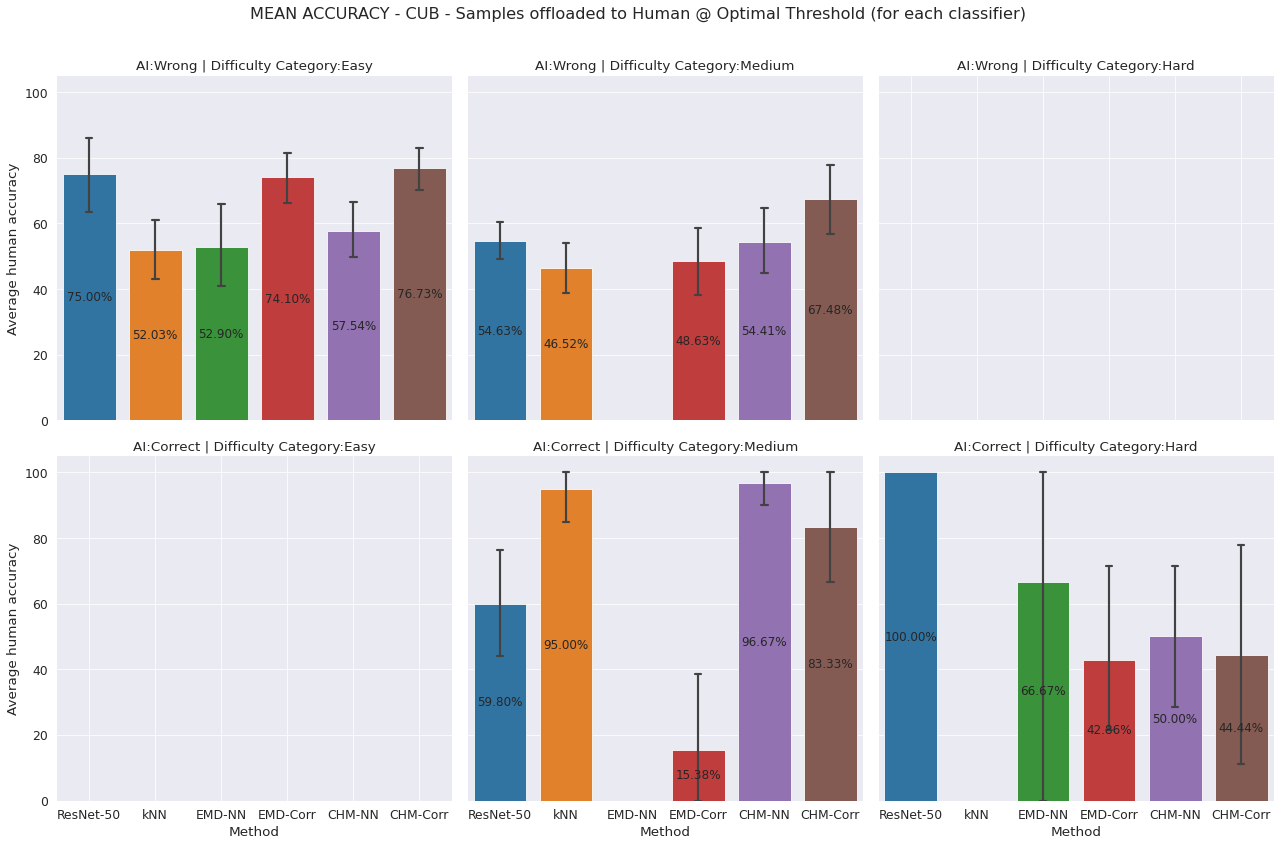

In [27]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_difflevel, col="DifficultyLevel", row="ClassifierCorrectness", height=6, col_order=['Easy', 'Medium', 'Hard'])
  g.map(sns.barplot, "Method", "mean", order=['ResNet-50', 'kNN', 'EMD-NN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr'], palette="tab10", capsize=.1)

  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, fmt='%.2f%%', label_type='center')

  plt.ylim(0, 105)
  
  axes = g.axes.flatten()
  for ci, C in enumerate(['Wrong', 'Correct']):
    for di, D in enumerate(['Easy', 'Medium', 'Hard']):
      axes[(ci*3)+di].set_title(f"AI:{C} | Difficulty Category:{D}")

  axes[0].set_ylabel('Average human accuracy')
  axes[3].set_ylabel('Average human accuracy')

  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle('MEAN ACCURACY - CUB - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n')
  
  plt.show()

In [28]:
df_correctness = df_offloads.groupby(['UID', 'Method', 'ClassifierCorrectness'])['Correctness'].agg(["count", "sum", "mean"]).unstack().stack().reset_index()
df_correctness['mean'] *=100

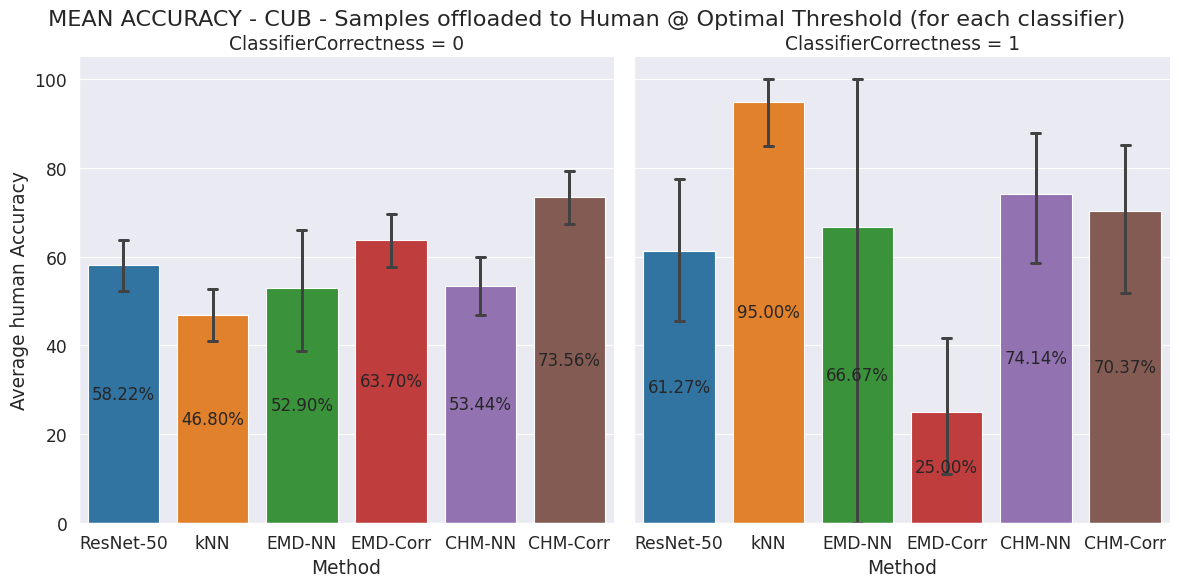

In [29]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_correctness, col="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "mean", order=['ResNet-50', 'kNN', 'EMD-NN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr'], palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='center', fmt='%.2f%%')

  axes = g.axes.flatten()
  axes[0].set_ylabel('Average human Accuracy')

  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle('MEAN ACCURACY - CUB - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n')
  
  plt.show()

In [30]:
df_correctness_count = df_offloads.groupby(['Method', 'ClassifierCorrectness'])['UID'].count().reset_index()

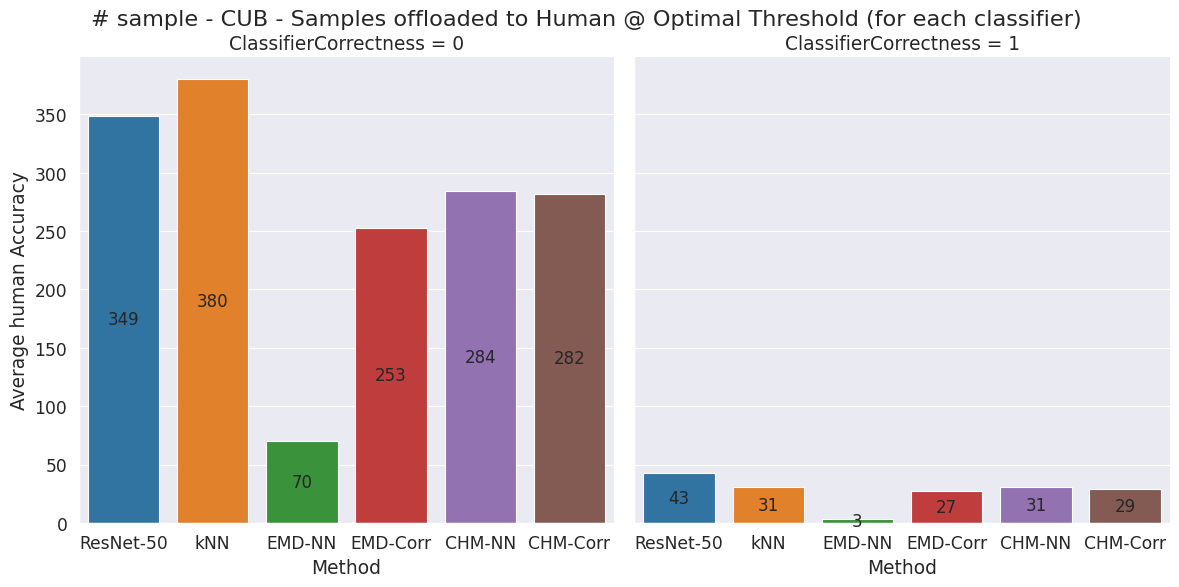

In [31]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(df_correctness_count, col="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "UID", order=['ResNet-50', 'kNN', 'EMD-NN', 'EMD-Corr', 'CHM-NN', 'CHM-Corr'], palette="tab10", capsize=.1)
  
  [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=12, label_type='center')

  axes = g.axes.flatten()
  axes[0].set_ylabel('Average human Accuracy')
  
  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle('# sample - CUB - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n')
  
  plt.show()

In [32]:
df_for_human = df[df['ConfidenceScore'] <optimal_T_cub['kNN']]

In [33]:
df_for_human.groupby(['Method', 'ClassifierCorrectness'])['UID'].count().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,ClassifierCorrectness,UID
8,ResNet-50,0,165
9,ResNet-50,1,8
10,kNN,0,380
11,kNN,1,31
6,EMD-NN,0,370
7,EMD-NN,1,37
4,EMD-Corr,0,381
5,EMD-Corr,1,50
2,CHM-NN,0,415
3,CHM-NN,1,55


In [34]:
df_for_human.groupby('Method')['Correctness'].mean().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,Correctness
4,ResNet-50,0.693642
5,kNN,0.508516
3,EMD-NN,0.476658
2,EMD-Corr,0.587007
1,CHM-NN,0.531915
0,CHM-Corr,0.635776


In [35]:
df_for_human.groupby(['Method', 'DifficultyLevel'])['UID'].count().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,DifficultyLevel,UID
14,ResNet-50,Medium,90
13,ResNet-50,Hard,1
12,ResNet-50,Easy,82
16,kNN,Medium,269
15,kNN,Easy,142
11,EMD-NN,Medium,258
10,EMD-NN,Hard,11
9,EMD-NN,Easy,138
8,EMD-Corr,Medium,266
6,EMD-Corr,Easy,151


In [36]:
df_for_human.groupby(['Method', 'ClassifierCorrectness'])['UID'].count().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,ClassifierCorrectness,UID
8,ResNet-50,0,165
9,ResNet-50,1,8
10,kNN,0,380
11,kNN,1,31
6,EMD-NN,0,370
7,EMD-NN,1,37
4,EMD-Corr,0,381
5,EMD-Corr,1,50
2,CHM-NN,0,415
3,CHM-NN,1,55


In [37]:
df_for_human.groupby(['Method', 'ClassifierCorrectness'])['Correctness'].mean().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,ClassifierCorrectness,Correctness
8,ResNet-50,0,0.703030
9,ResNet-50,1,0.500000
10,kNN,0,0.471053
11,kNN,1,0.967742
6,EMD-NN,0,0.440541
7,EMD-NN,1,0.837838
4,EMD-Corr,0,0.595801
5,EMD-Corr,1,0.520000
2,CHM-NN,0,0.503614
3,CHM-NN,1,0.745455
